In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.463786,0.409957,-4.677950e-07,0.404692,0.374220,-0.009972,0.367072,0.307559,-0.013017,0.371770,...,0.483561,0.220181,-0.024545,0.474400,0.267595,-0.015547,0.477098,0.299221,-0.002924,0
1,0.467766,0.377975,-4.446241e-07,0.409267,0.344005,-0.010736,0.371207,0.273035,-0.013804,0.380524,...,0.489199,0.186966,-0.025494,0.481098,0.234684,-0.016094,0.484765,0.266103,-0.003076,0
2,0.471632,0.356120,-4.672046e-07,0.414178,0.322415,-0.009584,0.374963,0.254344,-0.011258,0.380995,...,0.489042,0.165292,-0.022770,0.481644,0.214753,-0.013186,0.486172,0.246700,0.000763,0
3,0.476053,0.296072,-4.132160e-07,0.416597,0.266903,-0.010684,0.380142,0.198605,-0.013279,0.395307,...,0.495500,0.116338,-0.030201,0.489096,0.165361,-0.021700,0.492391,0.197350,-0.008866,0
4,0.481510,0.307754,-4.443635e-07,0.422798,0.277364,-0.008911,0.386642,0.204951,-0.009748,0.400474,...,0.504111,0.122745,-0.028939,0.496504,0.171526,-0.020077,0.498379,0.203583,-0.006981,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,0.820792,0.656545,-7.729143e-07,0.740396,0.579801,0.013852,0.707590,0.490334,0.015672,0.698230,...,0.728360,0.417863,-0.055333,0.693805,0.407226,-0.059365,0.666017,0.393318,-0.061491,Z
3595,0.825221,0.662497,-7.985095e-07,0.745164,0.582460,0.017322,0.710451,0.492392,0.020586,0.697932,...,0.722825,0.417628,-0.054489,0.685248,0.408344,-0.058535,0.655194,0.397205,-0.060440,Z
3596,0.830907,0.655500,-7.743278e-07,0.749529,0.584197,0.016094,0.714613,0.495907,0.019444,0.703342,...,0.725173,0.417814,-0.052486,0.684130,0.411530,-0.056672,0.650415,0.403596,-0.058395,Z
3597,0.834876,0.663958,-8.099589e-07,0.754523,0.585231,0.016308,0.720847,0.494632,0.019814,0.707617,...,0.740718,0.425409,-0.054825,0.705003,0.416178,-0.059369,0.675315,0.405190,-0.061257,Z


In [12]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.463786,0.409957,-4.677950e-07,0.404692,0.374220,-0.009972,0.367072,0.307559,-0.013017,0.371770,...,0.483561,0.220181,-0.024545,0.474400,0.267595,-0.015547,0.477098,0.299221,-0.002924,0
1,0.467766,0.377975,-4.446241e-07,0.409267,0.344005,-0.010736,0.371207,0.273035,-0.013804,0.380524,...,0.489199,0.186966,-0.025494,0.481098,0.234684,-0.016094,0.484765,0.266103,-0.003076,0
2,0.471632,0.356120,-4.672046e-07,0.414178,0.322415,-0.009584,0.374963,0.254344,-0.011258,0.380995,...,0.489042,0.165292,-0.022770,0.481644,0.214753,-0.013186,0.486172,0.246700,0.000763,0
3,0.476053,0.296072,-4.132160e-07,0.416597,0.266903,-0.010684,0.380142,0.198605,-0.013279,0.395307,...,0.495500,0.116338,-0.030201,0.489096,0.165361,-0.021700,0.492391,0.197350,-0.008866,0
4,0.481510,0.307754,-4.443635e-07,0.422798,0.277364,-0.008911,0.386642,0.204951,-0.009748,0.400474,...,0.504111,0.122745,-0.028939,0.496504,0.171526,-0.020077,0.498379,0.203583,-0.006981,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,0.820792,0.656545,-7.729143e-07,0.740396,0.579801,0.013852,0.707590,0.490334,0.015672,0.698230,...,0.728360,0.417863,-0.055333,0.693805,0.407226,-0.059365,0.666017,0.393318,-0.061491,Z
3595,0.825221,0.662497,-7.985095e-07,0.745164,0.582460,0.017322,0.710451,0.492392,0.020586,0.697932,...,0.722825,0.417628,-0.054489,0.685248,0.408344,-0.058535,0.655194,0.397205,-0.060440,Z
3596,0.830907,0.655500,-7.743278e-07,0.749529,0.584197,0.016094,0.714613,0.495907,0.019444,0.703342,...,0.725173,0.417814,-0.052486,0.684130,0.411530,-0.056672,0.650415,0.403596,-0.058395,Z
3597,0.834876,0.663958,-8.099589e-07,0.754523,0.585231,0.016308,0.720847,0.494632,0.019814,0.707617,...,0.740718,0.425409,-0.054825,0.705003,0.416178,-0.059369,0.675315,0.405190,-0.061257,Z


In [13]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (3599, 63)
Labels shape = (3599,)


In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [15]:
y_pred = svm.predict(x_test)
y_pred

array(['D', 'A', '7', 'A', '6', 'D', 'V', '5', '6', '8', '1', '7', '8',
       'Y', 'T', 'X', 'V', 'Z', '3', 'Z', 'W', '9', '3', 'Z', 'J', 'E',
       '5', '8', '5', 'H', 'N', '5', '2', 'A', 'Q', 'B', '0', 'K', '0',
       'G', 'S', '7', 'A', '9', 'F', '9', '2', 'Z', 'U', 'S', 'J', 'C',
       'L', 'Y', '9', 'D', 'B', 'N', 'T', 'L', '7', 'U', '5', 'E', 'F',
       '6', 'F', 'R', 'P', 'U', 'M', '5', 'P', 'X', 'M', '7', '8', 'U',
       '6', 'I', 'H', 'M', '4', '4', 'T', 'P', '8', 'Y', 'G', 'O', 'P',
       '4', 'H', '9', 'J', 'A', 'T', 'S', 'T', '2', '3', 'Q', 'Z', '0',
       '1', 'A', '7', 'F', '9', '5', 'T', 'S', '0', 'C', '4', 'R', '9',
       'T', 'Q', 'F', 'Z', 'T', '6', '1', 'F', 'G', '9', 'K', '5', 'F',
       'D', '6', 'M', 'P', '3', 'I', 'Q', 'E', 'E', '9', 'N', 'J', '1',
       'A', 'S', 'R', 'X', 'S', 'N', 'D', 'Q', '4', '8', 'G', 'R', 'B',
       'P', 'K', 'H', '4', '5', '1', 'W', '4', 'K', 'Y', '5', 'Q', 'R',
       '3', 'X', 'Z', 'J', '6', '5', '9', '1', '7', 'K', 'I', 'J

In [16]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
print('f1=',f1)
recall = recall_score(y_test, y_pred, average='micro')
print('recall=',recall)
precision = precision_score(y_test, y_pred, average='micro')
print('precision=',precision)
# f1, recall, precision

f1= 0.9486111111111111
recall= 0.9486111111111111
precision= 0.9486111111111111


<AxesSubplot:title={'center':'Confusion Matrix - Indian Sign Language'}>

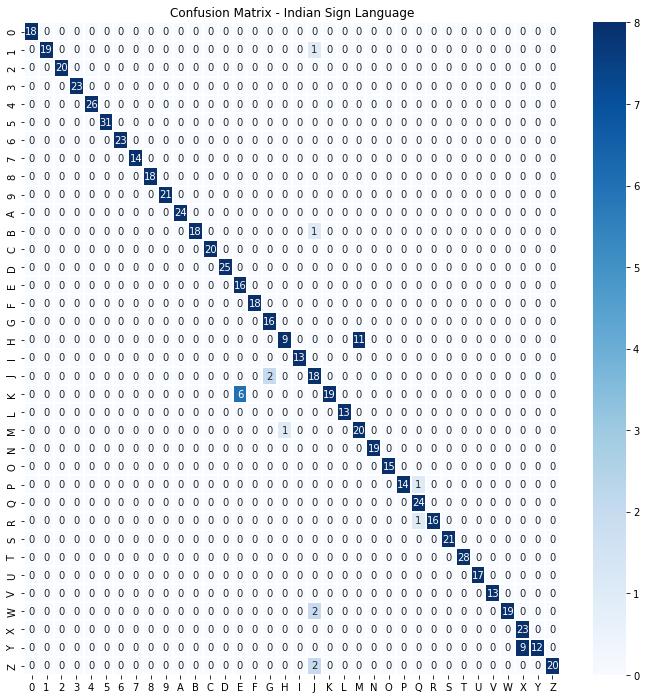

In [17]:
labels = sorted(list(set(df['Output'])))
# labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - Indian Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [18]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)